In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# importing main dataset
df = pd.read_csv('covid_19_india.csv',parse_dates=['Date'],dayfirst=True)
# we are using parse_dates to convert the date string into int.

In [3]:
# we see the top most five data of the dataset
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [4]:
# we are takig only our required columns rest of all we are removing from the our dataset.
df = df.drop(columns=['Sno','Time','ConfirmedIndianNational','ConfirmedForeignNational'])

In [5]:
df.head(3)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2


In [6]:
# now we are renaming the columns name.
df.rename(columns={'Date':'date','State/UnionTerritory':'state','Cured':'cured','Death':'death','Confirmed':'confirmed'},inplace=True)

In [7]:
df.head(3)

,date,state,cured,Deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2


In [8]:
# looking at the latest dates
df.tail()

,date,state,cured,Deaths,confirmed
18105,2021-08-11,Telangana,638410,3831,650353
18106,2021-08-11,Tripura,77811,773,80660
18107,2021-08-11,Uttarakhand,334650,7368,342462
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812
18109,2021-08-11,West Bengal,1506532,18252,1534999


In [9]:
# last date of date of the dataset when we got last covid cases
lastdate = df[df.date=='2021-08-11']

In [10]:
lastdate

,date,state,cured,Deaths,confirmed
18074,2021-08-11,Andaman and Nicobar Islands,7412,129,7548
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182
18076,2021-08-11,Arunachal Pradesh,47821,248,50605
18077,2021-08-11,Assam,559684,5420,576149
18078,2021-08-11,Bihar,715352,9646,725279
18079,2021-08-11,Chandigarh,61150,811,61992
18080,2021-08-11,Chhattisgarh,988189,13544,1003356
18081,2021-08-11,Dadra and Nagar Haveli and Daman and Diu,10646,4,10654
18082,2021-08-11,Delhi,1411280,25068,1436852
18083,2021-08-11,Goa,167978,3164,172085


In [11]:
# Now shorting the data with respect to confirm cases.
max_confirmed_cases = lastdate.sort_values(by = 'confirmed',ascending=False)

In [12]:
max_confirmed_cases

,date,state,cured,Deaths,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18090,2021-08-11,Kerala,3396184,18004,3586693
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812
18109,2021-08-11,West Bengal,1506532,18252,1534999
18082,2021-08-11,Delhi,1411280,25068,1436852
18080,2021-08-11,Chhattisgarh,988189,13544,1003356
18099,2021-08-11,Odisha,972710,6565,988997


In [13]:
# getting top most state name which has maximum number of confirmed cases.
top_ststes_confirmed = max_confirmed_cases[0:5]

In [14]:
top_ststes_confirmed

,date,state,cured,Deaths,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18090,2021-08-11,Kerala,3396184,18004,3586693
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182


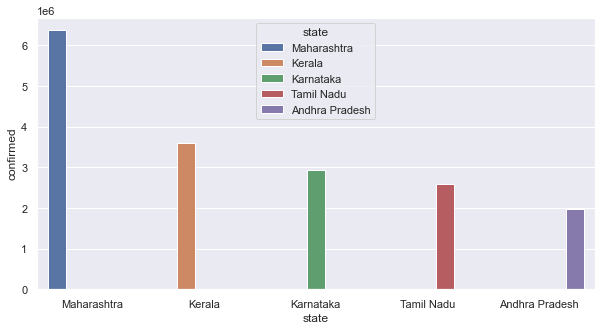

In [15]:
# Making bar plot for states with top confirm cases.
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='state',y = 'confirmed',data = top_ststes_confirmed, hue='state')
plt.show()

In [16]:
df.head(2)

,date,state,cured,Deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1


In [17]:
# Now shorting the data with respect to death cases.
max_death_cases = lastdate.sort_values(by = 'Deaths',ascending=False)
max_death_cases

,date,state,cured,Deaths,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18082,2021-08-11,Delhi,1411280,25068,1436852
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812
18109,2021-08-11,West Bengal,1506532,18252,1534999
18090,2021-08-11,Kerala,3396184,18004,3586693
18101,2021-08-11,Punjab,582791,16322,599573
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182
18080,2021-08-11,Chhattisgarh,988189,13544,1003356


In [18]:
# getting top most state name which has maximum number of Deaths cases.
top_states_death = max_death_cases[0:5]

In [19]:
top_states_death

,date,state,cured,Deaths,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18082,2021-08-11,Delhi,1411280,25068,1436852
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812


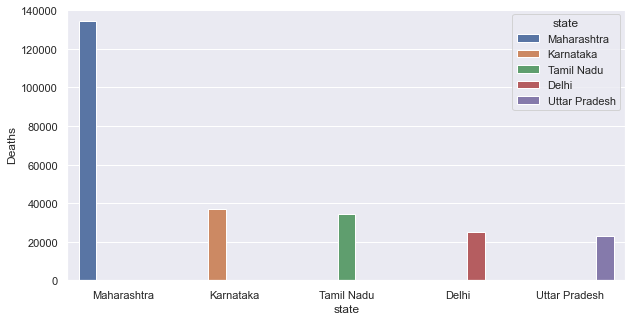

In [20]:
# Making bar plot for states with top confirm cases.
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='state',y = 'Deaths',data = top_states_death, hue='state')
plt.show()

In [21]:
# Now shorting the data with respect to death cured.
max_cured_cases = lastdate.sort_values(by = 'cured',ascending=False)
max_cured_cases

,date,state,cured,Deaths,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18090,2021-08-11,Kerala,3396184,18004,3586693
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812
18109,2021-08-11,West Bengal,1506532,18252,1534999
18082,2021-08-11,Delhi,1411280,25068,1436852
18080,2021-08-11,Chhattisgarh,988189,13544,1003356
18099,2021-08-11,Odisha,972710,6565,988997


In [22]:
# getting top most state name which has maximum number of cured cases.
top_states_cured = max_cured_cases[0:5]
top_states_cured

,date,state,cured,Deaths,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18090,2021-08-11,Kerala,3396184,18004,3586693
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182


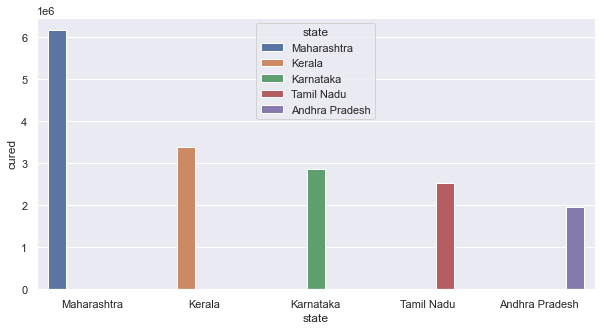

In [23]:
# Making bar plot for states with top confirm cured.
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='state',y = 'cured',data = top_states_cured, hue='state')
plt.show()

## Conculsion

  ### In confirmed cases has maximum no. of data for maharashtra , Kerala, Karnatka, tamilnadu and andhra pardesh. 
### But In death cases which has maximum no. of data is Maharashtra,Karnatka , tamilnadu , Delhi, and Uttar Pardesh.
### And In cured cases which has maximum no. of data is maharashtra , Kerala,Karnatka, tamilnadu and andhra pardesh. 

In [24]:
df.sample(2)

,date,state,cured,Deaths,confirmed
8537,2020-11-18,Kerala,461394,1915,533500
16708,2021-07-04,Arunachal Pradesh,33704,176,36937


In [25]:
# Now we see the mahrashtra confirmed and death cases from the our whole dataset.
maha = df[df.state == 'Maharashtra']

In [26]:
maha

,date,state,cured,Deaths,confirmed
76,2020-03-09,Maharashtra,0,0,2
91,2020-03-10,Maharashtra,0,0,5
97,2020-03-11,Maharashtra,0,0,2
120,2020-03-12,Maharashtra,0,0,11
133,2020-03-13,Maharashtra,0,0,14
...,...,...,...,...,...
17950,2021-08-07,Maharashtra,6130137,133717,6341759
17986,2021-08-08,Maharashtra,6139493,133845,6347820
18022,2021-08-09,Maharashtra,6144388,133996,6353328
18058,2021-08-10,Maharashtra,6151956,134064,6357833


### We can obserb here that the cases is starting in maharashtra from the 09-03-2020 to 11-08-2021.

<AxesSubplot:xlabel='date', ylabel='confirmed'>

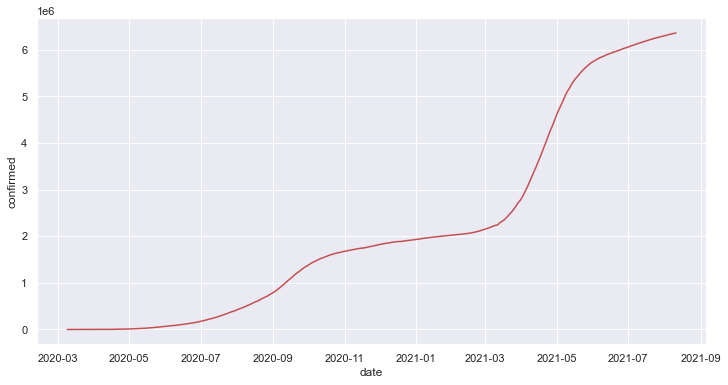

In [27]:
## Visulaizing the confirmed cases in maharashtra.
plt.figure(figsize=(12,6))
sns.lineplot(x= 'date', y='confirmed',data=maha,color='r')

<AxesSubplot:xlabel='date', ylabel='Deaths'>

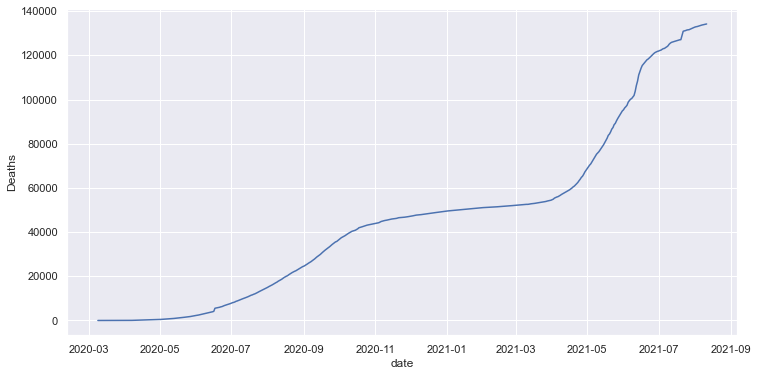

In [28]:
## Visulaizing the death cases in maharashtra.
plt.figure(figsize=(12,6))
sns.lineplot(x= 'date', y='Deaths',data=maha,color='b')

In [29]:
# Now we see the Kerla confirmed and death cases from the our whole dataset.
Kerla = df[df.state == 'Kerala']
Kerla

,date,state,cured,Deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
...,...,...,...,...,...
17946,2021-08-07,Kerala,3317314,17515,3513551
17982,2021-08-08,Kerala,3337579,17654,3533918
18018,2021-08-09,Kerala,3357687,17747,3552525
18054,2021-08-10,Kerala,3377691,17852,3565574


<AxesSubplot:xlabel='date', ylabel='confirmed'>

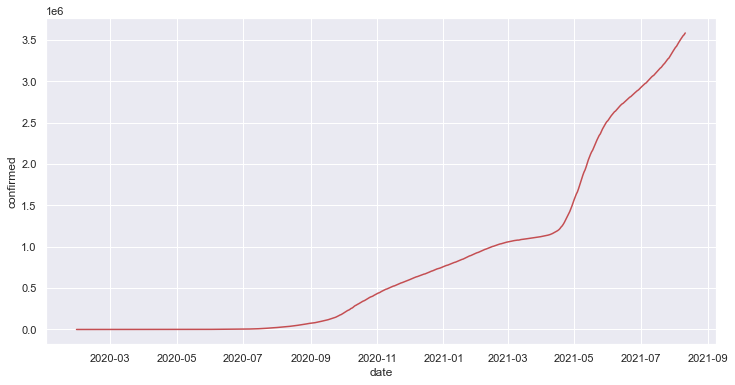

In [30]:
## Visulaizing the confirmed cases in Kerala.
plt.figure(figsize=(12,6))
sns.lineplot(x= 'date', y='confirmed',data=Kerla,color='r')

<AxesSubplot:xlabel='date', ylabel='Deaths'>

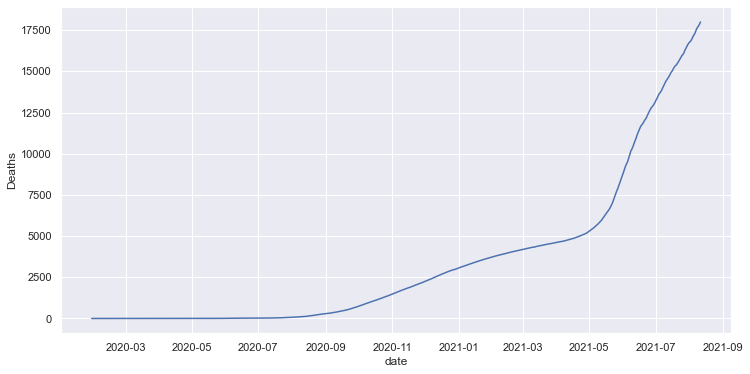

In [31]:
## Visulaizing the death cases in kerla.
plt.figure(figsize=(12,6))
sns.lineplot(x= 'date', y='Deaths',data=Kerla,color='b')

## Now Checking Statewise testing details

In [32]:
# importing the statewise testing data.
tests = pd.read_csv('StatewiseTestingDetails.csv')
tests

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
...,...,...,...,...,...
16331,2021-08-06,West Bengal,15999961.0,NaN,NaN
16332,2021-08-07,West Bengal,16045662.0,NaN,NaN
16333,2021-08-08,West Bengal,16092192.0,NaN,NaN
16334,2021-08-09,West Bengal,16122345.0,NaN,NaN


In [33]:
# we are extracting the details of the latest date which is persent in the dataset.

In [34]:
test_latest= tests[tests.Date == '2021-08-09']

In [35]:
test_latest

,Date,State,TotalSamples,Negative,Positive
452,2021-08-09,Andaman and Nicobar Islands,452587.0,NaN,NaN
939,2021-08-09,Andhra Pradesh,25247884.0,23264163,NaN
1416,2021-08-09,Arunachal Pradesh,981399.0,NaN,NaN
1885,2021-08-09,Assam,19736715.0,NaN,NaN
2374,2021-08-09,Bihar,38664314.0,NaN,NaN
2853,2021-08-09,Chandigarh,627283.0,563989,NaN
3335,2021-08-09,Chhattisgarh,11720007.0,NaN,NaN
3994,2021-08-09,Delhi,24268783.0,NaN,NaN
4477,2021-08-09,Goa,1097404.0,NaN,NaN
4964,2021-08-09,Gujarat,26131219.0,NaN,NaN


In [37]:
## shorting the data set with respect to total samples.
max_tests_state =test_latest.sort_values(by='TotalSamples',ascending=False)
max_tests_state

,Date,State,TotalSamples,Negative,Positive
15350,2021-08-09,Uttar Pradesh,67691677.0,NaN,NaN
9374,2021-08-09,Maharashtra,49725694.0,NaN,NaN
7408,2021-08-09,Karnataka,39978515.0,NaN,NaN
13994,2021-08-09,Tamil Nadu,38851889.0,NaN,NaN
2374,2021-08-09,Bihar,38664314.0,NaN,NaN
7905,2021-08-09,Kerala,28612776.0,NaN,NaN
4964,2021-08-09,Gujarat,26131219.0,NaN,NaN
939,2021-08-09,Andhra Pradesh,25247884.0,23264163,NaN
3994,2021-08-09,Delhi,24268783.0,NaN,NaN
14413,2021-08-09,Telangana,22902812.0,NaN,NaN


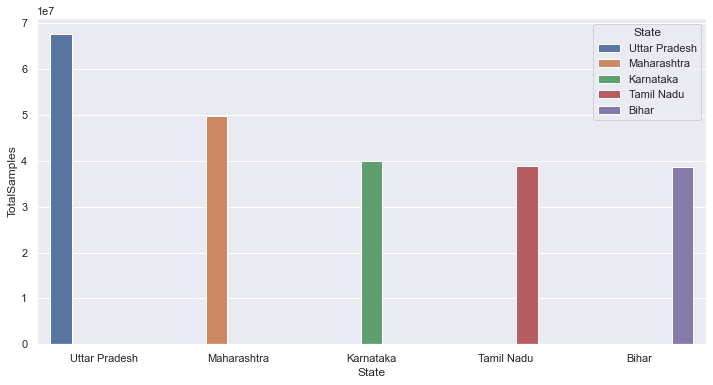

In [38]:
# making bar plot for stats with max test sample
plt.figure(figsize=(12,6))
sns.barplot(x='State', y ='TotalSamples', data=max_tests_state[0:5], hue='State' )
plt.show()

## Model Trainig

In [39]:
## Linear Regression
from sklearn.model_selection import train_test_split

In [40]:
maha

,date,state,cured,Deaths,confirmed
76,2020-03-09,Maharashtra,0,0,2
91,2020-03-10,Maharashtra,0,0,5
97,2020-03-11,Maharashtra,0,0,2
120,2020-03-12,Maharashtra,0,0,11
133,2020-03-13,Maharashtra,0,0,14
...,...,...,...,...,...
17950,2021-08-07,Maharashtra,6130137,133717,6341759
17986,2021-08-08,Maharashtra,6139493,133845,6347820
18022,2021-08-09,Maharashtra,6144388,133996,6353328
18058,2021-08-10,Maharashtra,6151956,134064,6357833


In [41]:
## Now for linear regression from we have to convert the date-time into ordinal.
maha['date'] = maha['date'].map(dt.datetime.toordinal)

<ipython-input-41-cf4160d8555f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maha['date'] = maha['date'].map(dt.datetime.toordinal)


In [42]:
maha.head(5)

,date,state,cured,Deaths,confirmed
76,737493,Maharashtra,0,0,2
91,737494,Maharashtra,0,0,5
97,737495,Maharashtra,0,0,2
120,737496,Maharashtra,0,0,11
133,737497,Maharashtra,0,0,14


In [43]:
# Creating a independent variable and dependent variable.
x = maha['date']
y= maha['confirmed']

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [57]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [58]:
x_train

8960     737759
2469     737575
4410     737629
4970     737645
14746    737920
          ...  
1240     737538
14278    737907
17950    738009
7420     737715
9490     737774
Name: date, Length: 364, dtype: int64

In [59]:
y_train

8960     1820059
2469       62228
4410      337607
4970      490262
14746    5101737
          ...   
1240        5652
14278    4343727
17950    6341759
7420     1576062
9490     1883365
Name: confirmed, Length: 364, dtype: int64

In [61]:
lr.fit(np.array(x_train).reshape(-1 ,1),np.array(y_train).reshape(-1,1))

LinearRegression()

In [63]:
maha.tail()

,date,state,cured,Deaths,confirmed
17950,738009,Maharashtra,6130137,133717,6341759
17986,738010,Maharashtra,6139493,133845,6347820
18022,738011,Maharashtra,6144388,133996,6353328
18058,738012,Maharashtra,6151956,134064,6357833
18094,738013,Maharashtra,6159676,134201,6363442


In [67]:
lr.predict(np.array([[738013]]))

array([[5566879.76340294]])